In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [195]:
df= pd.read_excel("LI_BFSI_01.xls")

In [196]:
df.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2     Unmarried        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [197]:
df.tail()

CustID  AgentBonus   Age  CustTenure Channel      Occupation  \
4515  7004515        3953   4.0         8.0   Agent  Small Business   
4516  7004516        2939   9.0         9.0   Agent        Salaried   
4517  7004517        3792  23.0        23.0   Agent        Salaried   
4518  7004518        4816  10.0        10.0  Online  Small Business   
4519  7004519        4764  14.0        10.0   Agent        Salaried   

      EducationField  Gender  ExistingProdType     Designation  \
4515        Graduate    Male                 4  Senior Manager   
4516  Under Graduate  Female                 2       Executive   
4517        Engineer  Female                 5             AVP   
4518        Graduate  Female                 4       Executive   
4519  Under Graduate  Female                 5         Manager   

      NumberOfPolicy MaritalStatus  MonthlyIncome  Complaint  \
4515             2.0        Single        26355.0          0   
4516             2.0       Married        20991.0          0   
4517             5.0        Single            NaN          0   
4518             2.0        Single        20068.0          0   
4519             2.0       Married        23820.0          0   

      ExistingPolicyTenure  SumAssured   Zone PaymentMethod  LastMonthCalls  \
4515                   2.0    636473.0   West        Yearly               9   
4516                   3.0    296813.0  North        Yearly               1   
4517                   2.0    667371.0  North   Half Yearly               4   
4518                   6.0    943999.0   West   Half Yearly               1   
4519                   3.0    700308.0  North   Half Yearly               1   

      CustCareScore  
4515            1.0  
4516            3.0  
4517            1.0  
4518            5.0  
4519            3.0

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [199]:
df.describe().T

count          mean            std        min  \
CustID                4520.0  7.002260e+06    1304.955938  7000000.0   
AgentBonus            4520.0  4.077838e+03    1403.321711     1605.0   
Age                   4251.0  1.449471e+01       9.037629        2.0   
CustTenure            4294.0  1.446903e+01       8.963671        2.0   
ExistingProdType      4520.0  3.688938e+00       1.015769        1.0   
NumberOfPolicy        4475.0  3.565363e+00       1.455926        1.0   
MonthlyIncome         4284.0  2.289031e+04    4885.600757    16009.0   
Complaint             4520.0  2.871681e-01       0.452491        0.0   
ExistingPolicyTenure  4336.0  4.130074e+00       3.346386        1.0   
SumAssured            4366.0  6.199997e+05  246234.822140   168536.0   
LastMonthCalls        4520.0  4.626991e+00       3.620132        0.0   
CustCareScore         4468.0  3.067592e+00       1.382968        1.0   

                             25%        50%         75%        max  
CustID                7001129.75  7002259.5  7003389.25  7004519.0  
AgentBonus               3027.75     3911.5     4867.25     9608.0  
Age                         7.00       13.0       20.00       58.0  
CustTenure                  7.00       13.0       20.00       57.0  
ExistingProdType            3.00        4.0        4.00        6.0  
NumberOfPolicy              2.00        4.0        5.00        6.0  
MonthlyIncome           19683.50    21606.0    24725.00    38456.0  
Complaint                   0.00        0.0        1.00        1.0  
ExistingPolicyTenure        2.00        3.0        6.00       25.0  
SumAssured             439443.25   578976.5   758236.00  1838496.0  
LastMonthCalls              2.00        3.0        8.00       18.0  
CustCareScore               2.00        3.0        4.00        5.0

In [200]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [201]:
df.shape

(4520, 20)

In [202]:
df.duplicated().sum()

0

In [203]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64


GENDER :  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64


DESIGNATION :  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64


MARITALSTATUS :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


ZONE :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dty

# EDA

In [204]:
categorical_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'ExistingProdType', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']

numerical_columns = ['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']

df['Churn'] = ((df['CustCareScore'] <= 3) | (df['Complaint'] == 1)).astype(int)


In [205]:
df['Gender'] = df['Gender'].replace('Fe male', 'Female')

In [206]:
df['EducationField'] = df['EducationField'].replace('UG', 'Under Graduate')

In [207]:
df['Occupation'] = df['Occupation'].replace('Laarge Business', 'Large Business')

In [208]:
df['Designation'] = df['Designation'].replace('Exe', 'Executive')

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


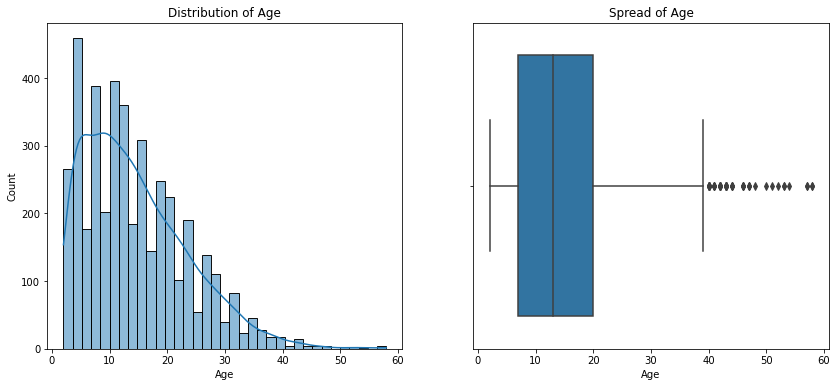

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


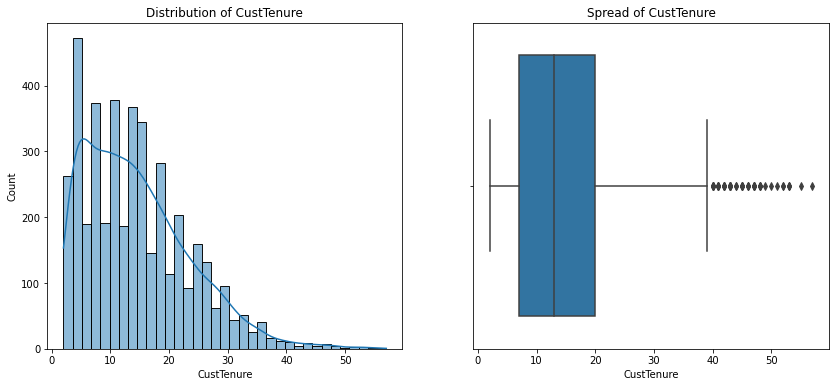

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


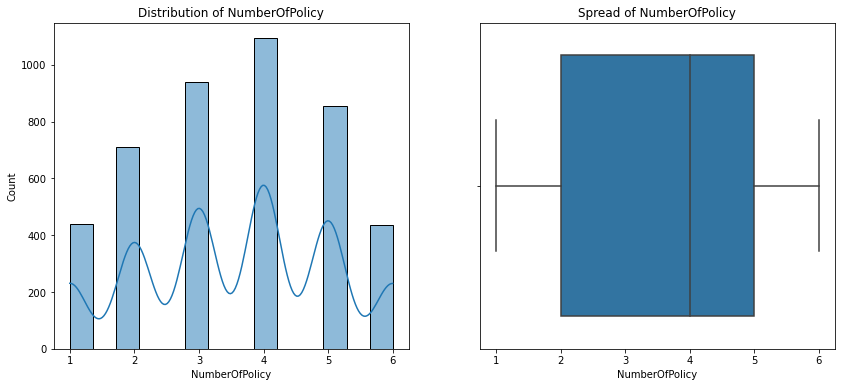

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


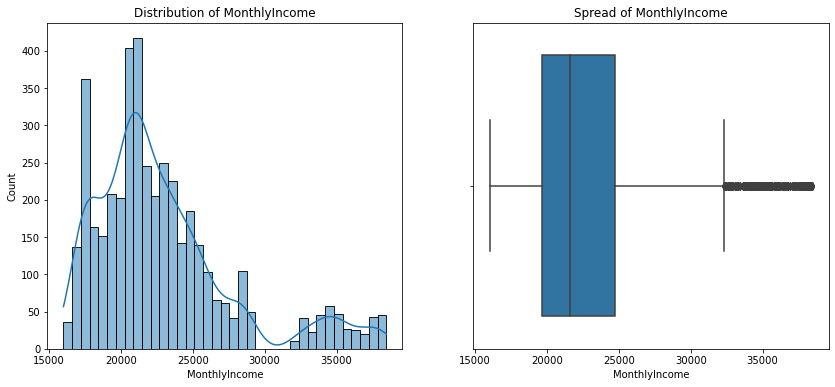

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


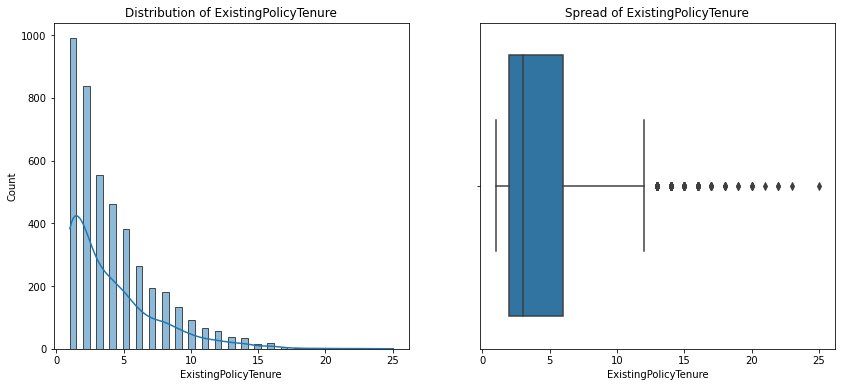

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


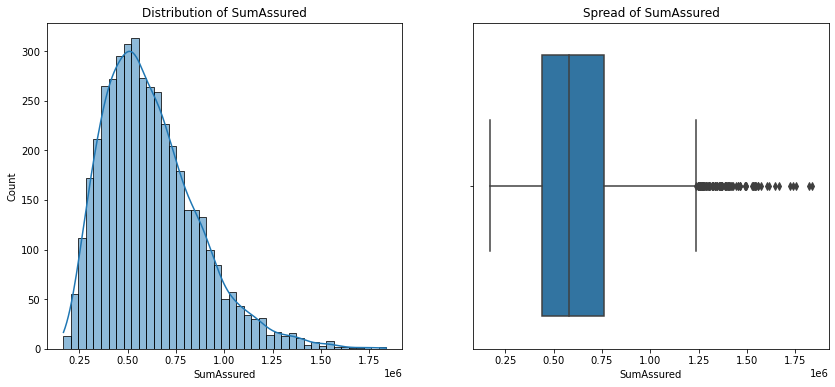

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


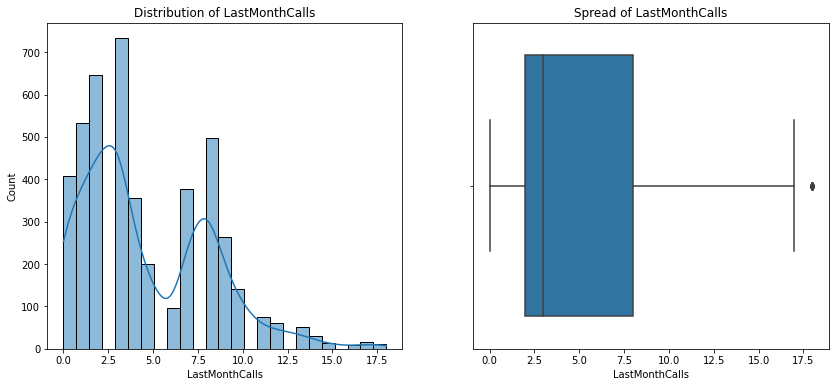

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


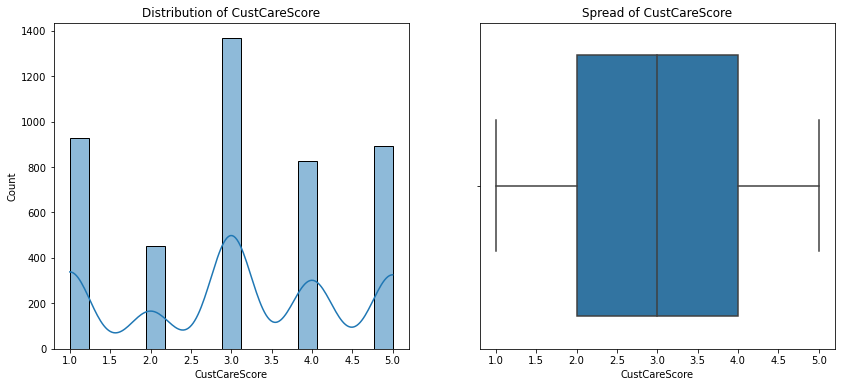

In [209]:
for col in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Spread of {col}')
    
    plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


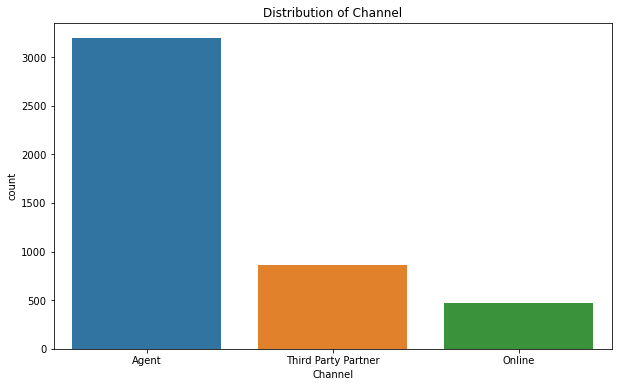

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


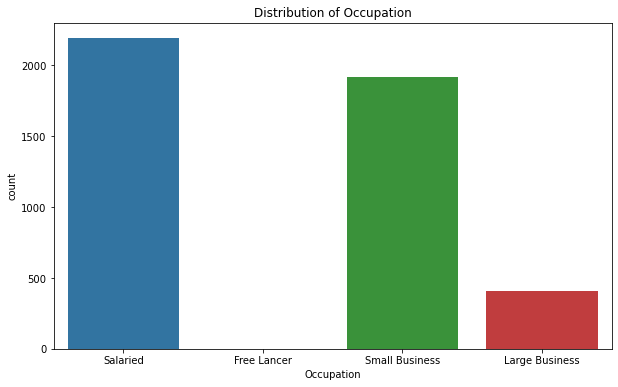

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


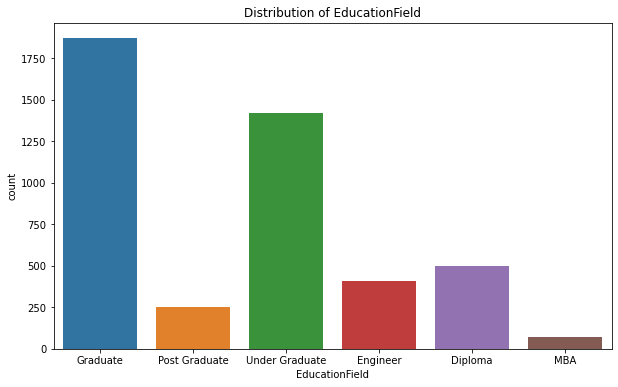

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


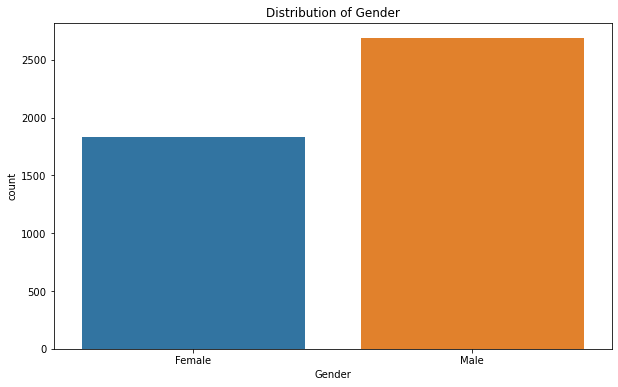

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


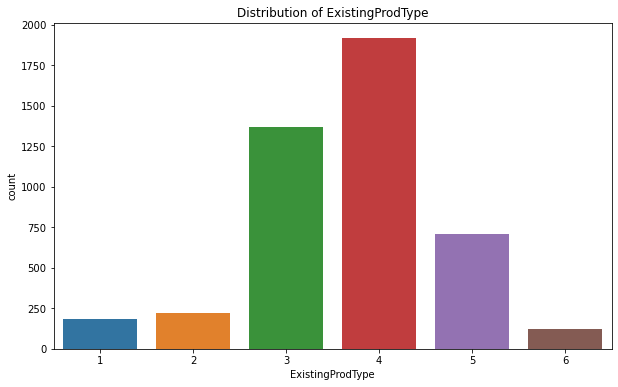

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


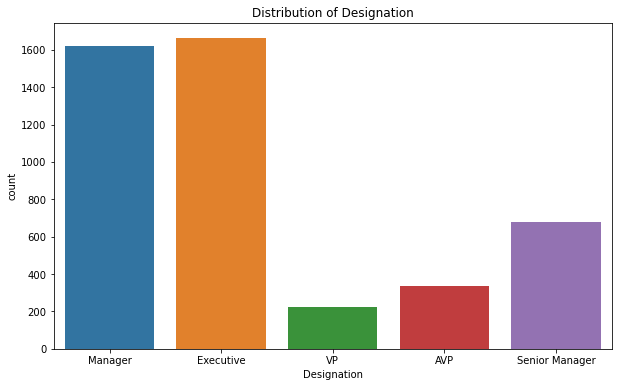

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


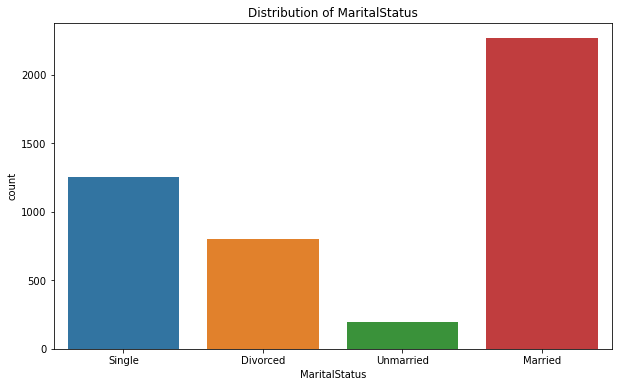

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


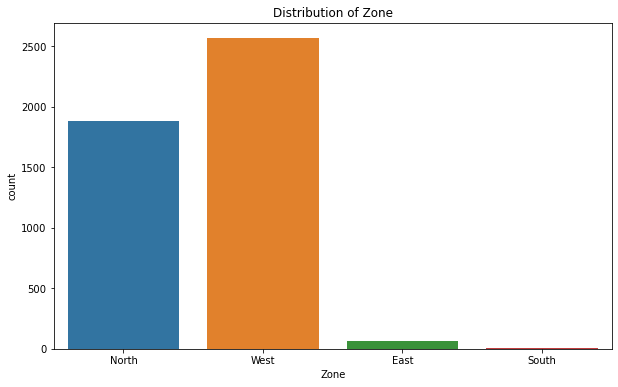

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


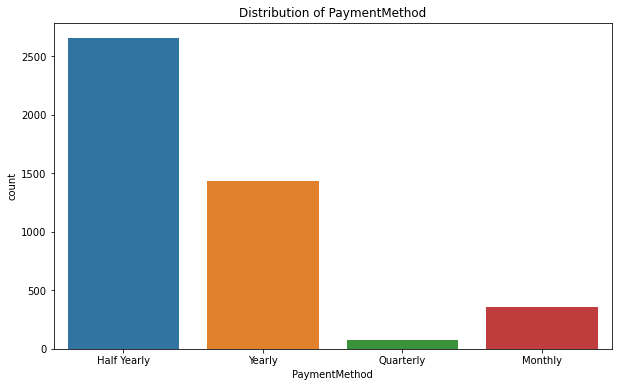

In [210]:
# Categorical Variables Analysis
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

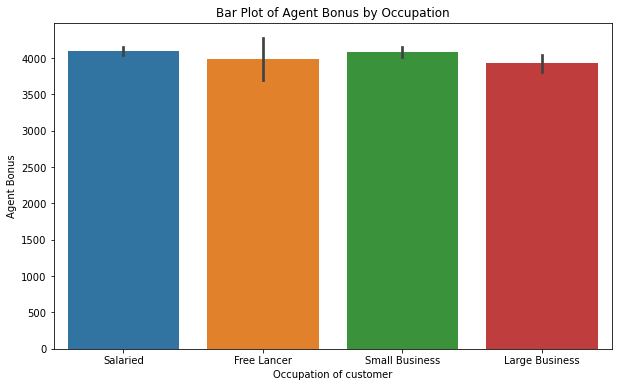

In [211]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='AgentBonus', data=df)
plt.title('Bar Plot of Agent Bonus by Occupation')
plt.xlabel('Occupation of customer')
plt.ylabel('Agent Bonus')
plt.show()

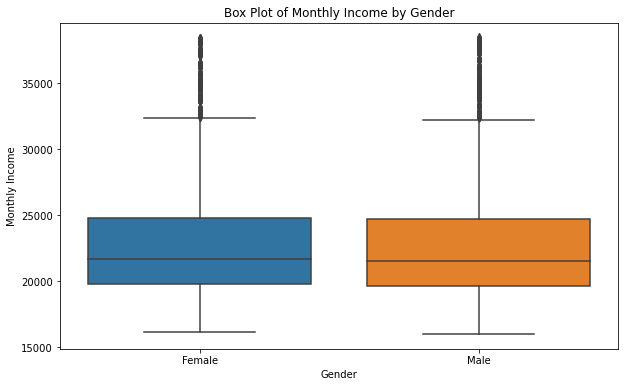

In [212]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)
plt.title('Box Plot of Monthly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


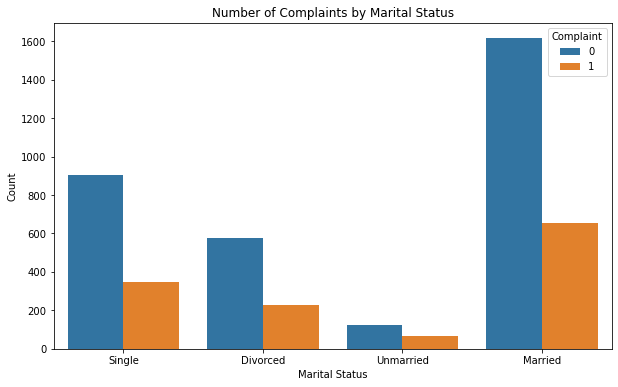

In [213]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Complaint', data=df)
plt.title('Number of Complaints by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

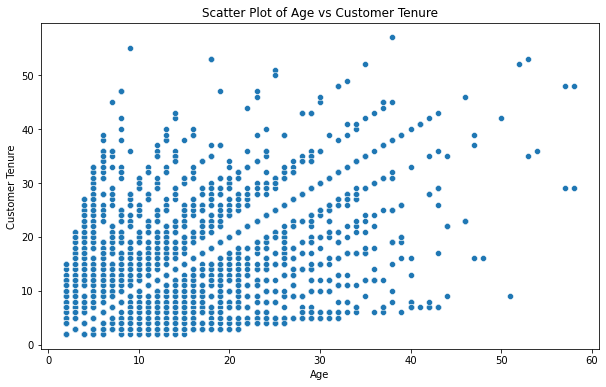

In [214]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CustTenure', data=df)
plt.title('Scatter Plot of Age vs Customer Tenure')
plt.xlabel('Age')
plt.ylabel('Customer Tenure')
plt.show()

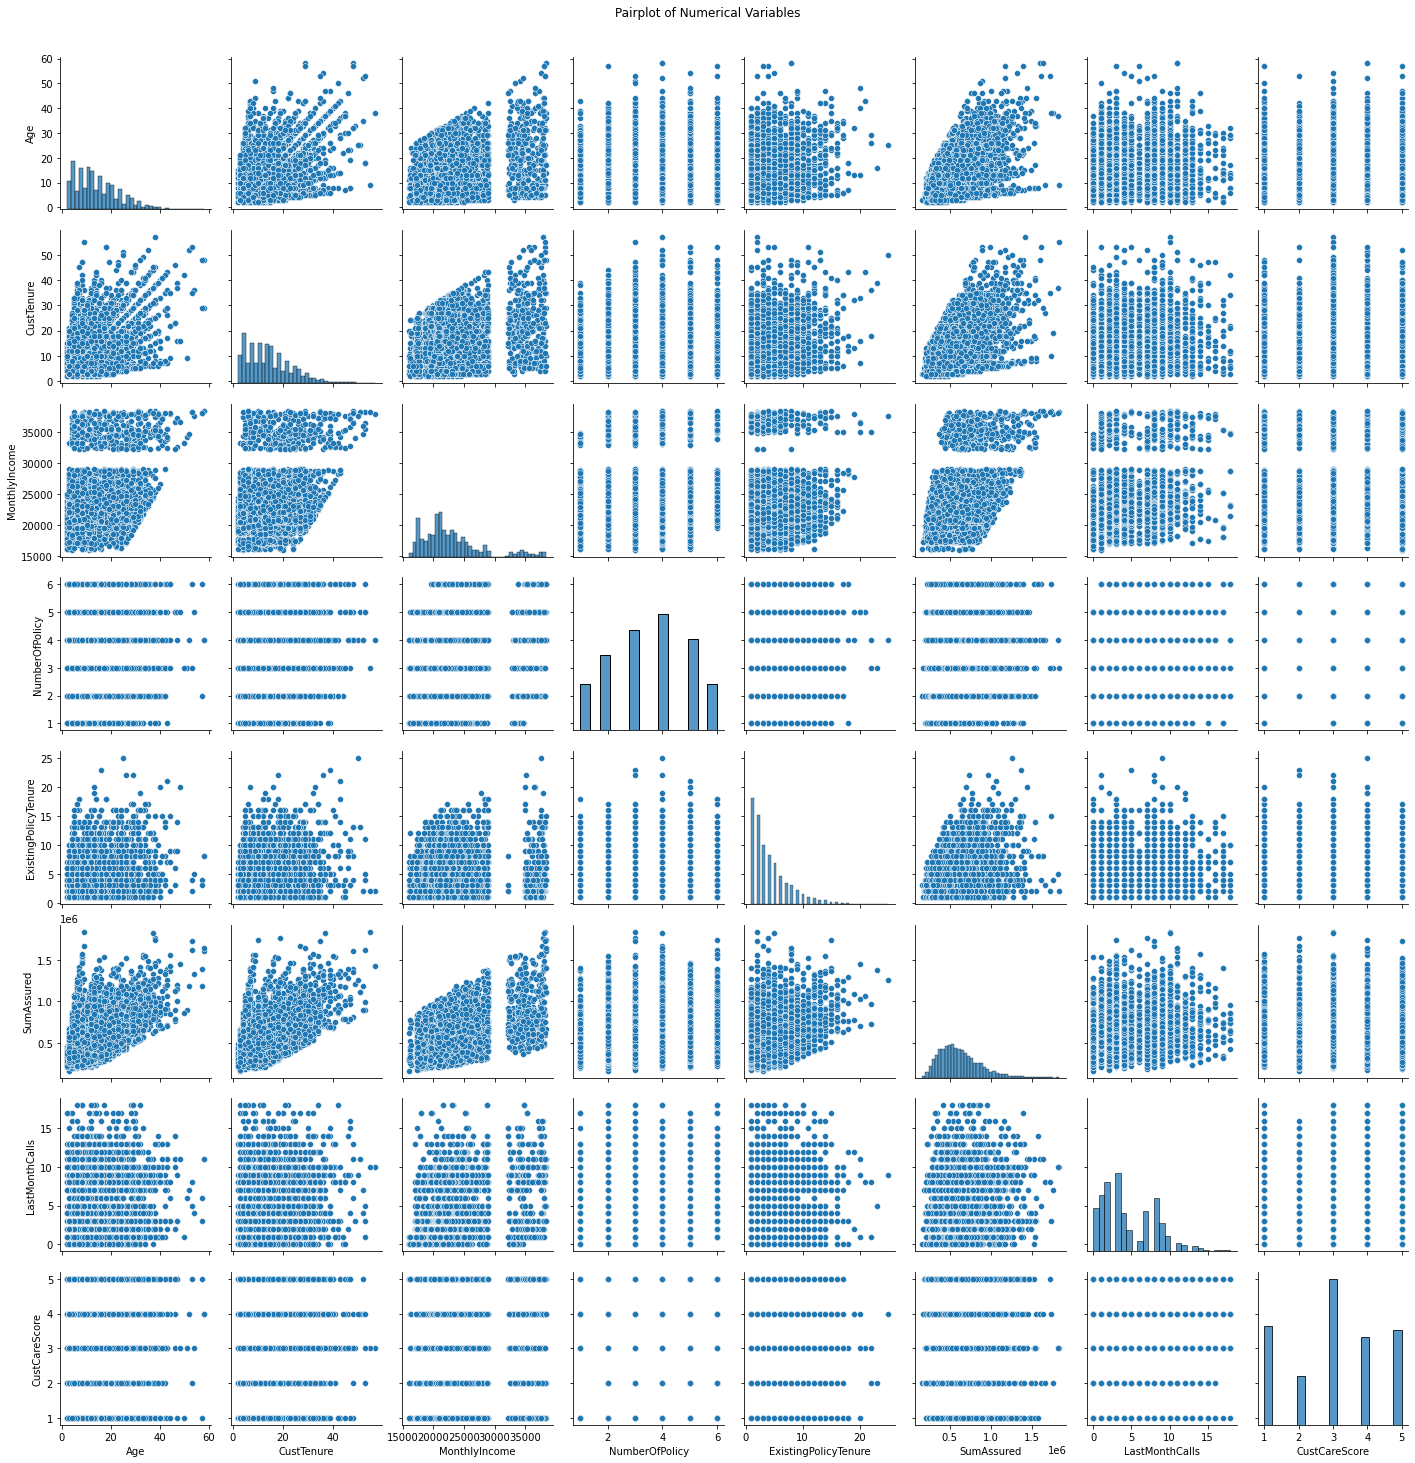

In [215]:
numerical_vars = ['Age', 'CustTenure', 'MonthlyIncome', 'NumberOfPolicy', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
sns.pairplot(df[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


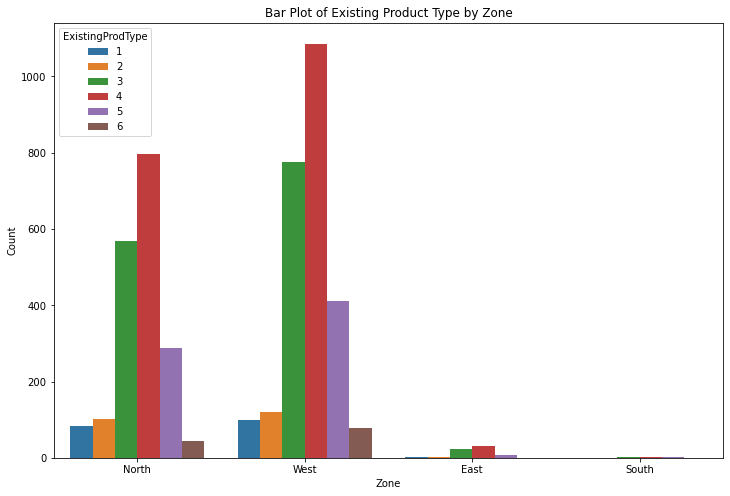

In [216]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Zone', hue='ExistingProdType', data=df)
plt.title('Bar Plot of Existing Product Type by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

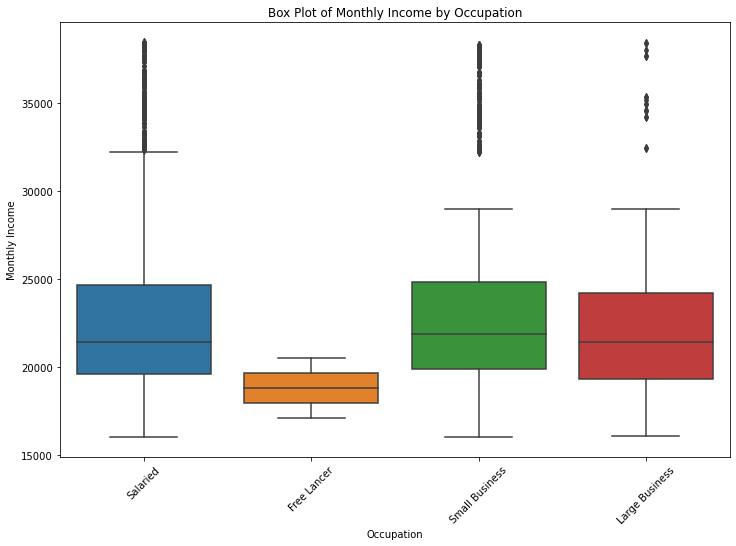

In [217]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='MonthlyIncome', data=df)
plt.title('Box Plot of Monthly Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

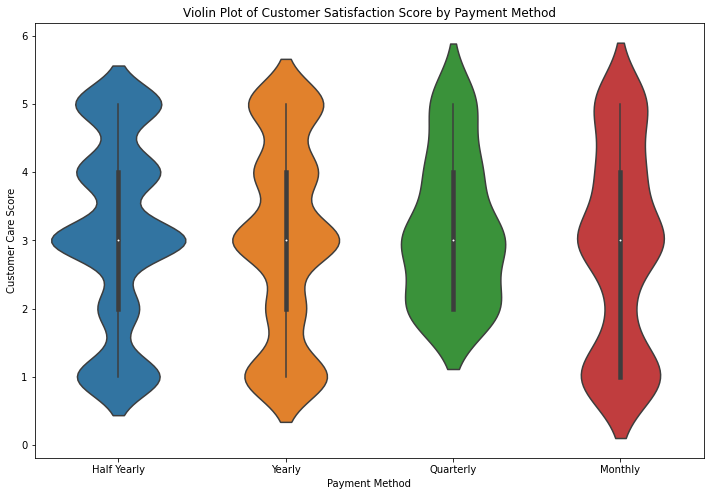

In [218]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='PaymentMethod', y='CustCareScore', data=df)
plt.title('Violin Plot of Customer Satisfaction Score by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Customer Care Score')
plt.show()

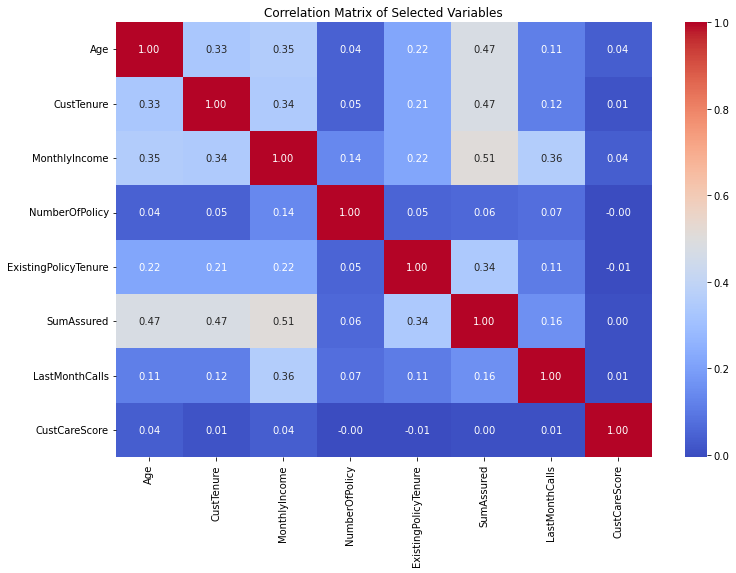

In [219]:
selected_vars = ['Age', 'CustTenure', 'MonthlyIncome', 'NumberOfPolicy', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
correlation_matrix = df[selected_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


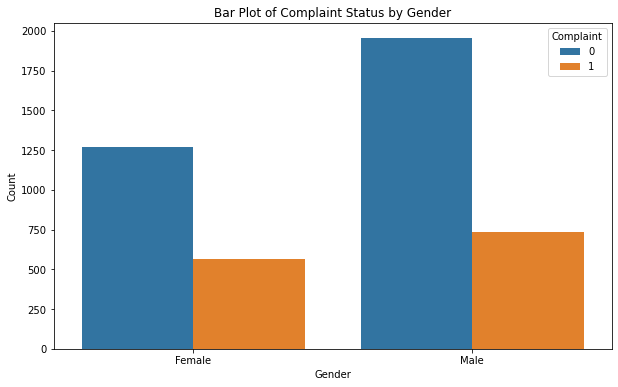

In [220]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Complaint', data=df)
plt.title('Bar Plot of Complaint Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


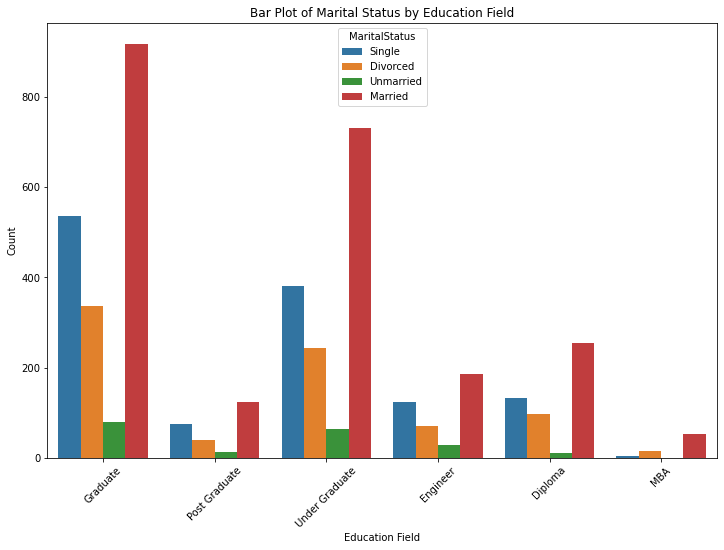

In [221]:
plt.figure(figsize=(12, 8))
sns.countplot(x='EducationField', hue='MaritalStatus', data=df)
plt.title('Bar Plot of Marital Status by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x432 with 0 Axes>

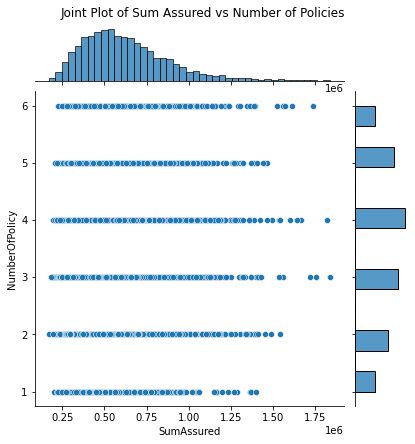

In [222]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='SumAssured', y='NumberOfPolicy', data=df, kind='scatter')
plt.suptitle('Joint Plot of Sum Assured vs Number of Policies', y=1.02)
plt.xlabel('Sum Assured')
plt.ylabel('Number of Policies')
plt.show()

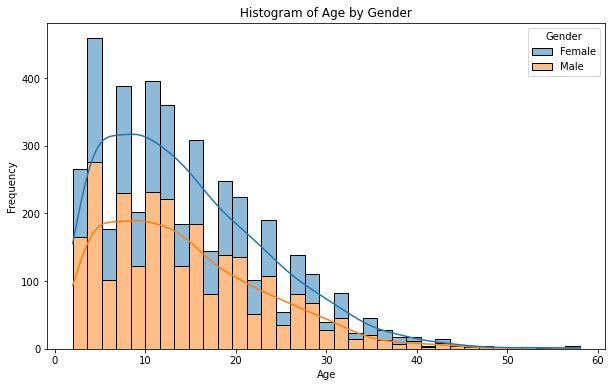

In [223]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', kde=True)
plt.title('Histogram of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

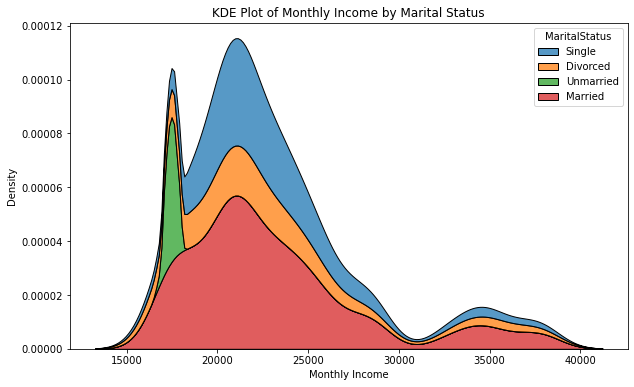

In [224]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MonthlyIncome', hue='MaritalStatus', multiple='stack')
plt.title('KDE Plot of Monthly Income by Marital Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


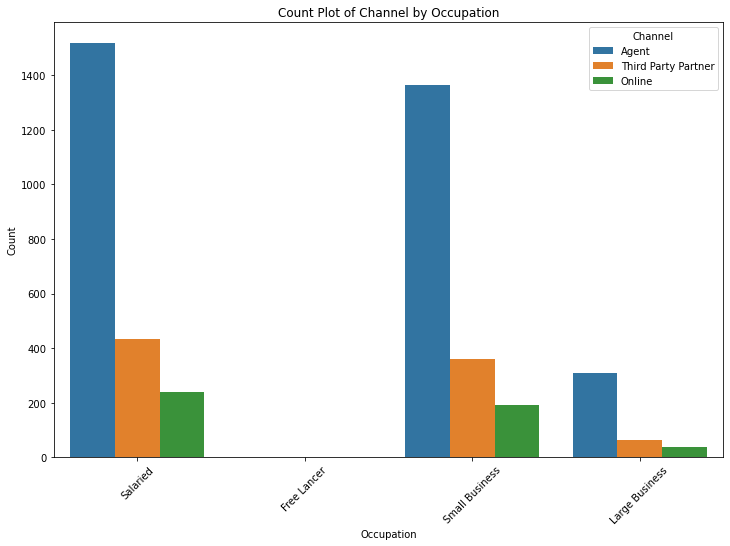

In [225]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Channel', data=df)
plt.title('Count Plot of Channel by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

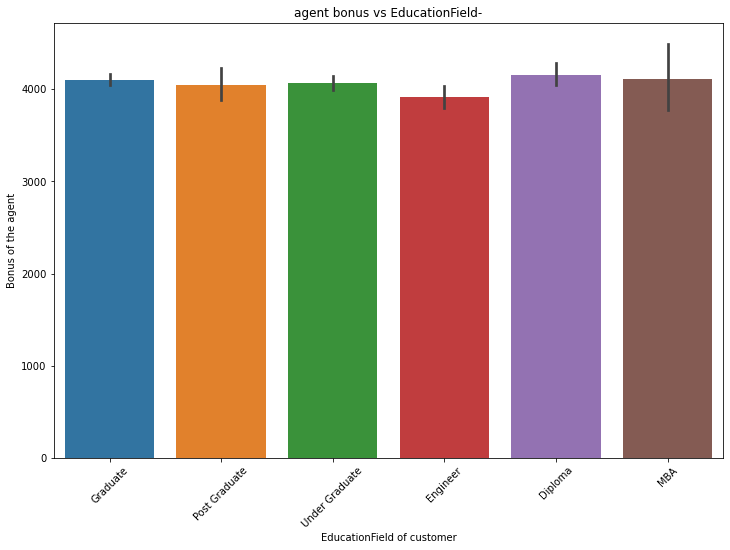

In [226]:
plt.figure(figsize=(12, 8))
sns.barplot(x='EducationField', y='AgentBonus', data=df)
plt. title('agent bonus vs EducationField-')
plt.xlabel( 'EducationField of customer') 
plt.ylabel( 'Bonus of the agent') 
plt.xticks(rotation=45)
plt.show()

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


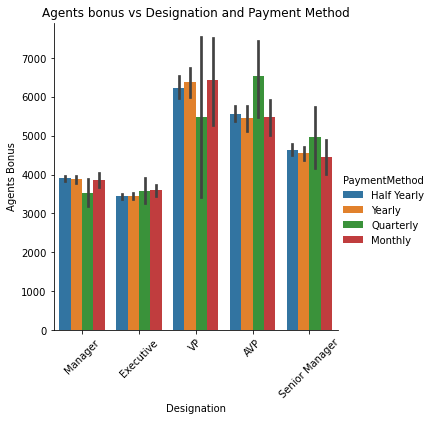

In [227]:
sns.catplot(x='Designation', y='AgentBonus', hue='PaymentMethod', kind='bar', data=df)
plt.title('Agents bonus vs Designation and Payment Method')
plt.xlabel('Designation')
plt.ylabel('Agents Bonus')
plt.xticks(rotation=45)
plt.show()

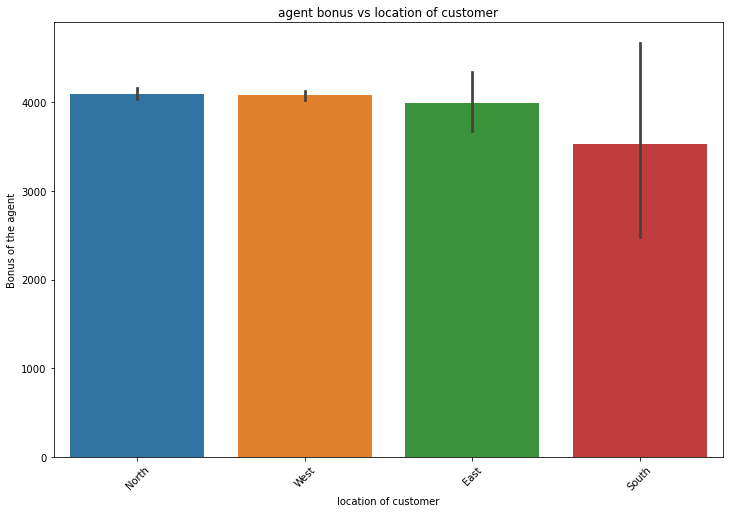

In [228]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Zone', y='AgentBonus', data=df)
plt. title('agent bonus vs location of customer')
plt.xlabel( 'location of customer') 
plt.ylabel( 'Bonus of the agent') 
plt.xticks(rotation=45)
plt.show()

In [229]:
imputer_num = SimpleImputer(strategy='mean')
df['Age'] = imputer_num.fit_transform(df[['Age']])
df['CustTenure'] = imputer_num.fit_transform(df[['CustTenure']])
df['NumberOfPolicy'] = imputer_num.fit_transform(df[['NumberOfPolicy']])
df['MonthlyIncome'] = imputer_num.fit_transform(df[['MonthlyIncome']])
df['ExistingPolicyTenure'] = imputer_num.fit_transform(df[['ExistingPolicyTenure']])
df['SumAssured'] = imputer_num.fit_transform(df[['SumAssured']])
df['CustCareScore'] = imputer_num.fit_transform(df[['CustCareScore']])

print("Missing Values after imputation:\n", df.isnull().sum())

Missing Values after imputation:
 CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
Churn                   0
dtype: int64


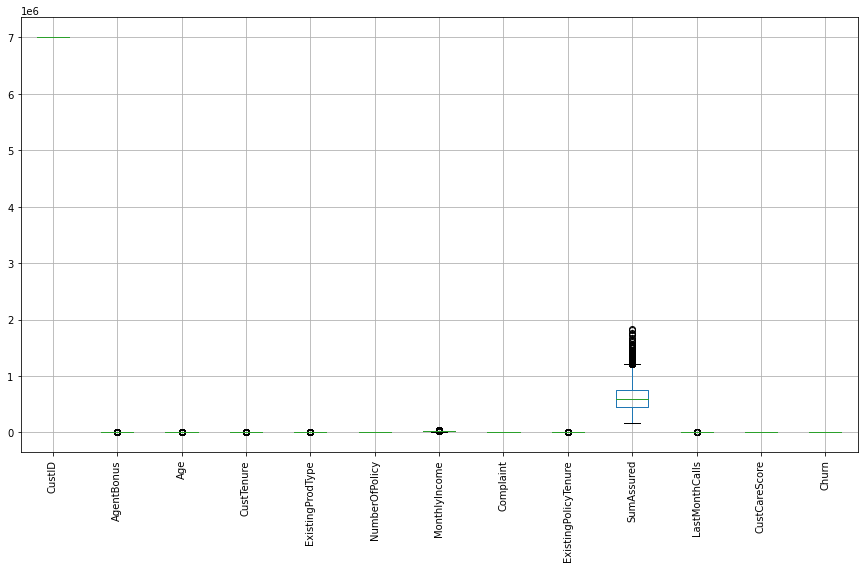

In [230]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

In [231]:

outliers_count = {}

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column in the DataFrame
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each numeric column:")
outliers_df = pd.DataFrame([{'Column': column, 'No. of outliers': count} for column, count in outliers_count.items()])
print(outliers_df)

Number of outliers in each numeric column:
                  Column  No. of outliers
0                 CustID                0
1             AgentBonus              100
2                    Age              105
3             CustTenure               97
4       ExistingProdType              306
5         NumberOfPolicy                0
6          MonthlyIncome              384
7              Complaint                0
8   ExistingPolicyTenure              345
9             SumAssured              110
10        LastMonthCalls               12
11         CustCareScore                0
12                 Churn                0


In [232]:
def remove_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

numeric_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column in the DataFrame
for column in numeric_columns:
    lower_limit, upper_limit = remove_outlier(df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])

# Display the first few rows of the modified DataFrame
print(df.head())

      CustID  AgentBonus   Age  CustTenure              Channel  \
0  7000000.0      4409.0  22.0    4.000000                Agent   
1  7000001.0      2214.0  11.0    2.000000  Third Party Partner   
2  7000002.0      4273.0  26.0    4.000000                Agent   
3  7000003.0      1791.0  11.0   14.469027  Third Party Partner   
4  7000004.0      2955.0   6.0   14.469027                Agent   

       Occupation  EducationField  Gender  ExistingProdType Designation  ...  \
0        Salaried        Graduate  Female               3.0     Manager  ...   
1        Salaried        Graduate    Male               4.0     Manager  ...   
2     Free Lancer   Post Graduate    Male               4.0   Executive  ...   
3        Salaried        Graduate  Female               3.0   Executive  ...   
4  Small Business  Under Graduate    Male               3.0   Executive  ...   

   MaritalStatus MonthlyIncome  Complaint  ExistingPolicyTenure  \
0         Single       20993.0        1.0        

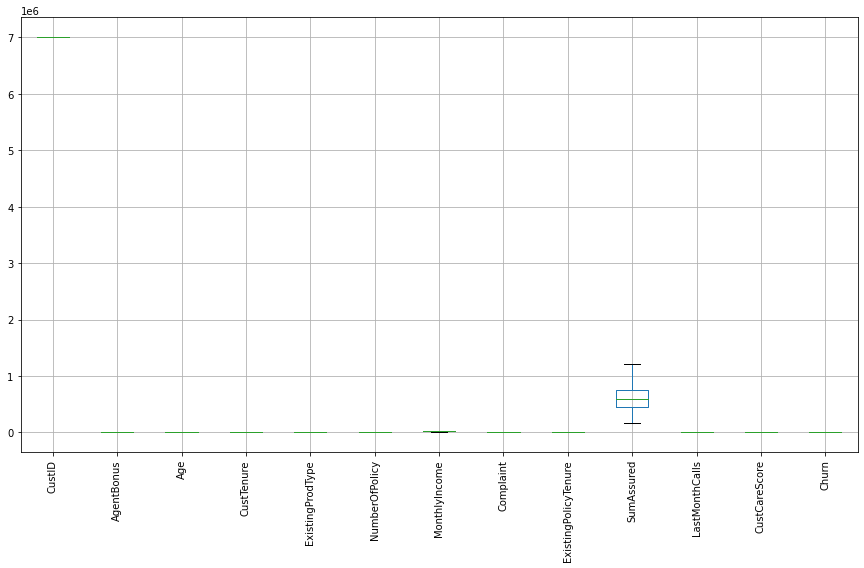

In [233]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show();

Class distribution of Churn:
1.0    3253
0.0    1267
Name: Churn, dtype: int64


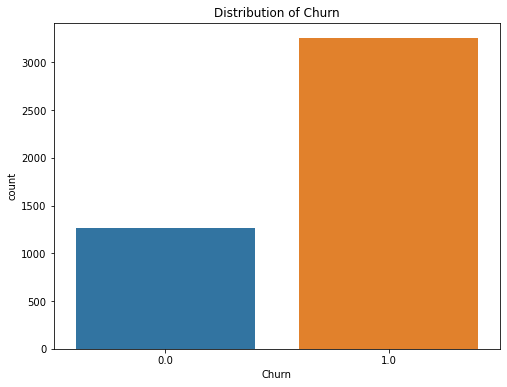

In [234]:
churn_counts = df['Churn'].value_counts()
print("Class distribution of Churn:")
print(churn_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

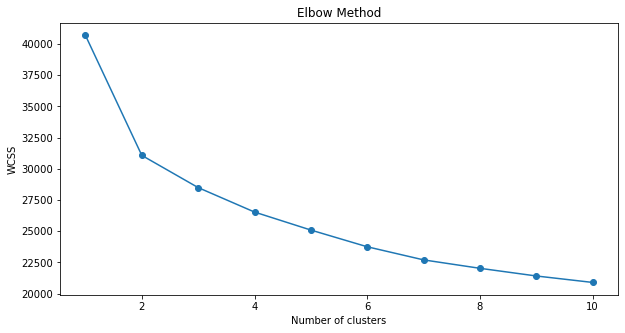

               CustID   AgentBonus        Age  CustTenure  ExistingProdType  \
Cluster                                                                       
0        7.001984e+06  3002.659309  10.070226   10.001643          3.575096   
1        7.002665e+06  6195.056022  24.461485   23.302521          3.918067   
2        7.002425e+06  4461.629501  15.377889   15.867059          3.749129   

         NumberOfPolicy  MonthlyIncome  Complaint  ExistingPolicyTenure  \
Cluster                                                                   
0              3.356046   20561.235377   0.285988              2.540370   
1              3.746201   27771.243899   0.313725              5.278067   
2              3.743701   22855.020028   0.277584              4.999863   

            SumAssured  LastMonthCalls  CustCareScore     Churn  
Cluster                                                          
0        452419.696114        3.715451       3.061985  0.721209  
1        946110.129552        

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


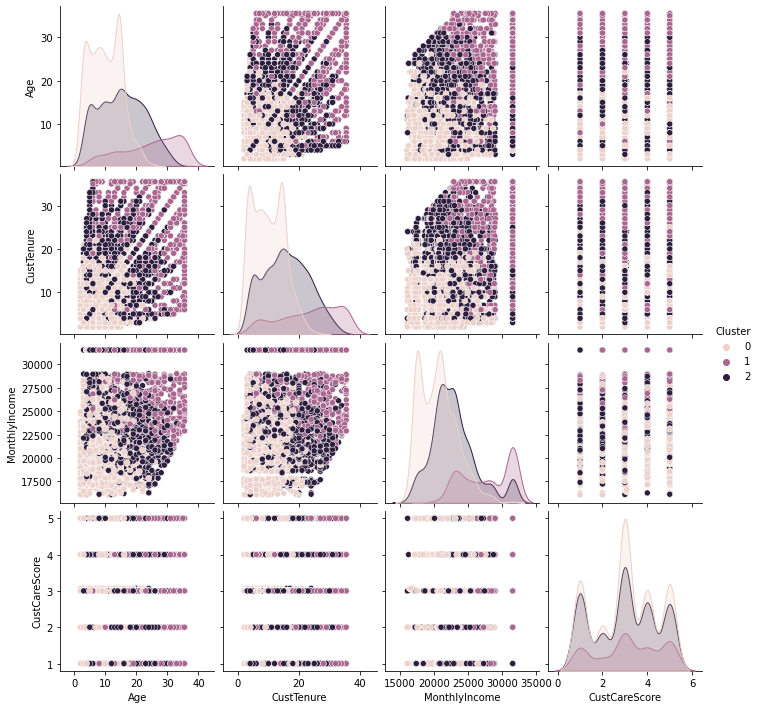

In [235]:
# Select relevant features for clustering
features = df[['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose the number of clusters
n_clusters = 3  # Example: Choose 3 clusters

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Analyze clusters
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Age', 'CustTenure', 'MonthlyIncome', 'CustCareScore'])
plt.show()

# MODEL BUILDING

## Descriptive Modeling

### Clustering 

               CustID   AgentBonus        Age  CustTenure  ExistingProdType  \
Cluster                                                                       
0        7.002670e+06  6212.229599  24.086445   23.027663          3.921853   
1        7.001926e+06  2999.981318  10.136078   10.006126          3.533677   
2        7.002476e+06  4407.449801  15.258817   15.770301          3.789563   

         NumberOfPolicy  MonthlyIncome  Complaint  ExistingPolicyTenure  \
Cluster                                                                   
0              3.729396   27810.731506   0.318119              5.373859   
1              3.299410   20319.835634   0.289086              2.619715   
2              3.804928   23027.182416   0.272263              4.797864   

            SumAssured  LastMonthCalls  CustCareScore     Churn  
Cluster                                                          
0        947529.766598        6.712310       3.156293  0.721992  
1        453145.603146        

/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/Users/apoorva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


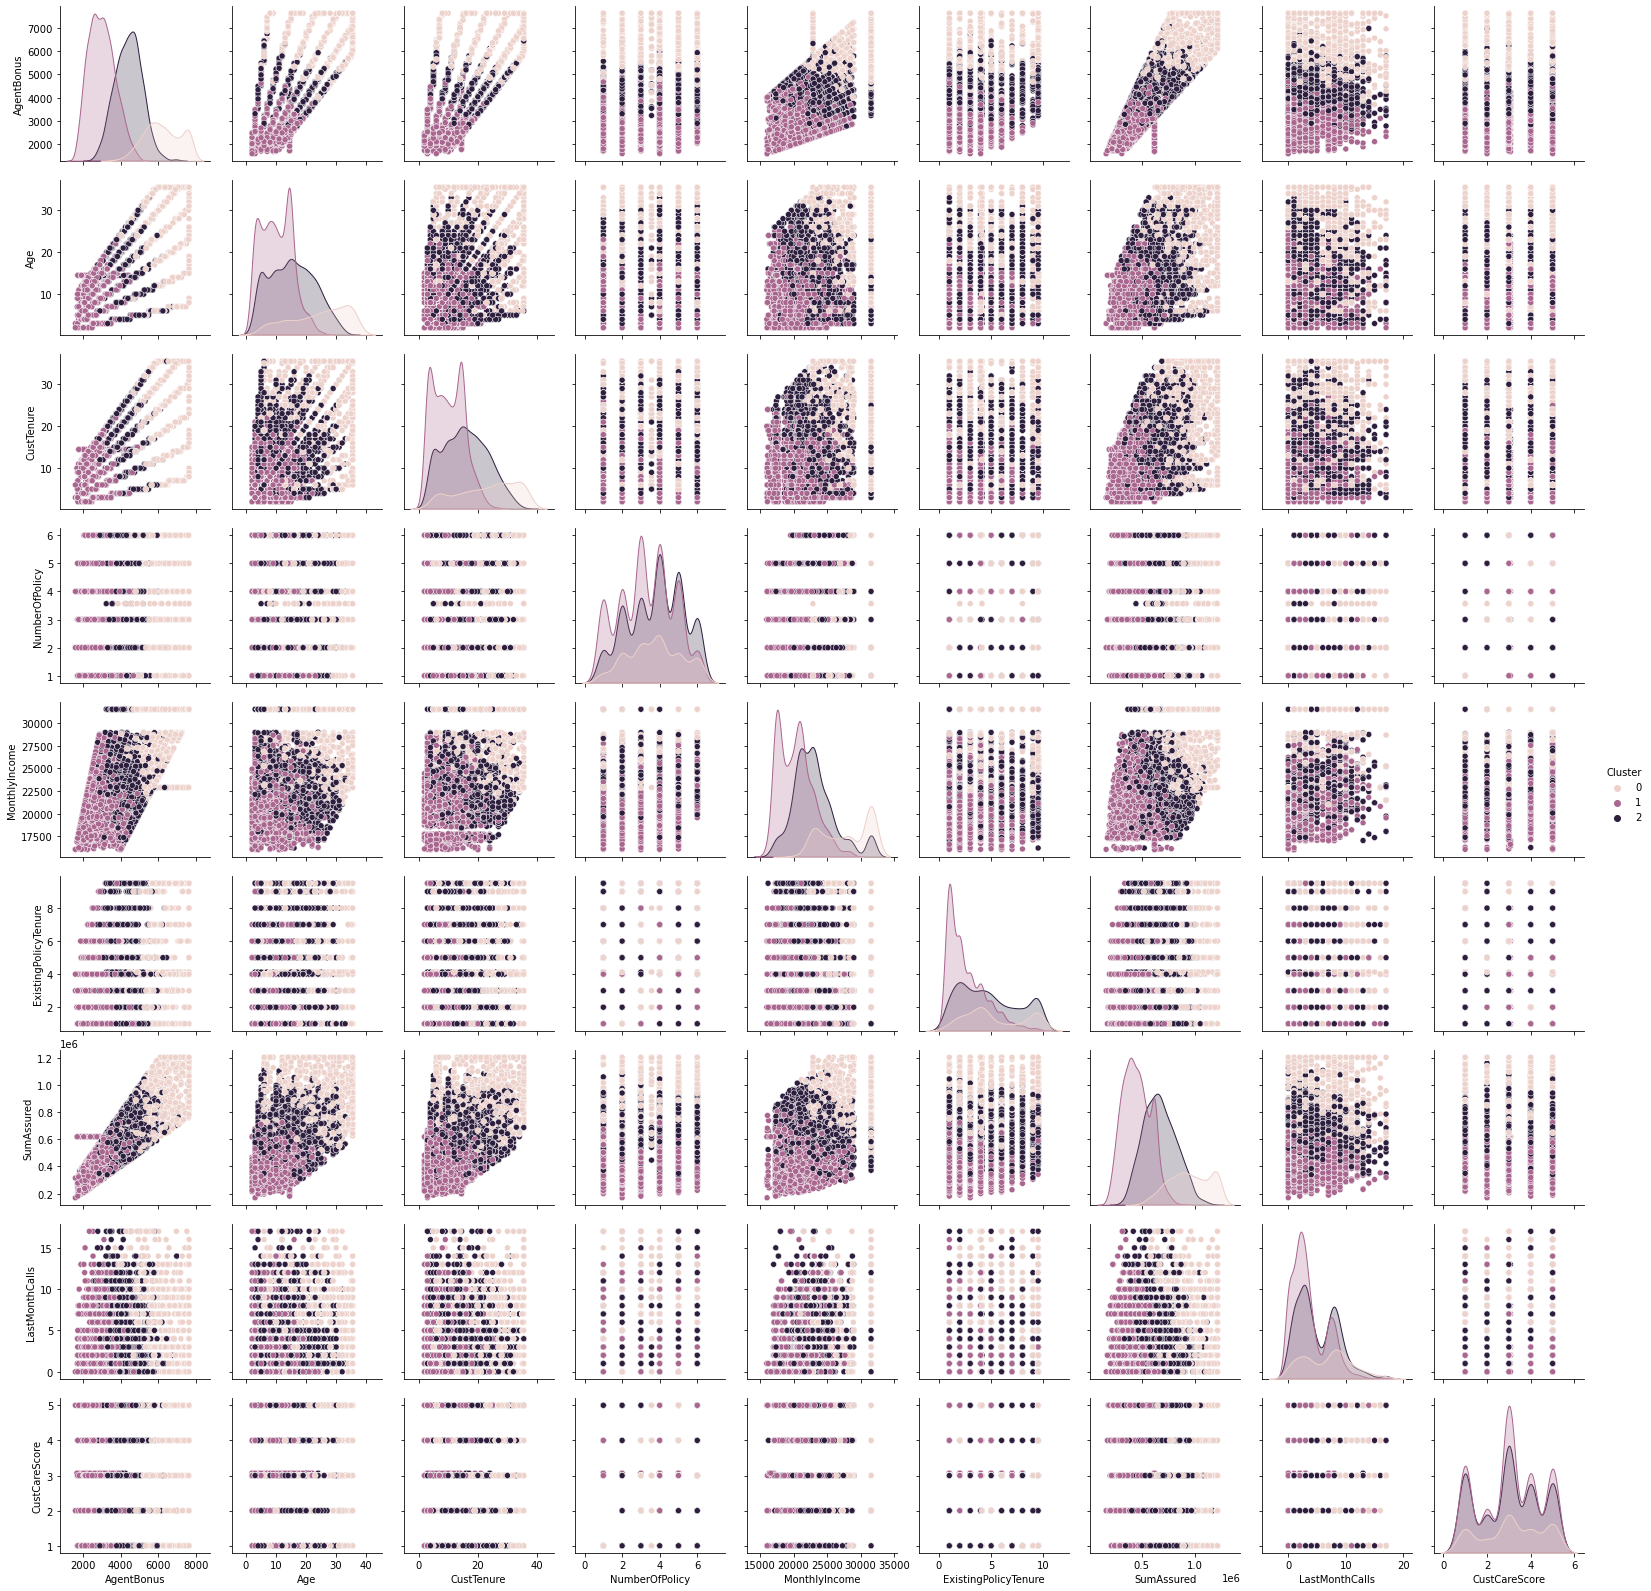

In [236]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = ['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
categorical_features = ['Channel', 'Occupation', 'EducationField', 'Gender', 'ExistingProdType', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']

# Preprocess the data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and clustering pipeline
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume 3 clusters for this example
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', kmeans)])

# Fit the pipeline to the data
pipeline.fit(df)

# Assign clusters
df['Cluster'] = pipeline.named_steps['cluster'].labels_

# Analyze clusters
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=features)
plt.show()


### Dimensionality reduction techniques  PCA 

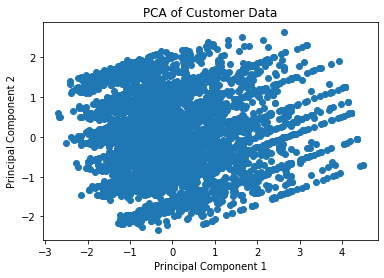

In [237]:
from sklearn.decomposition import PCA

# Select features for PCA
features = ['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the PCA results
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Profiling 

In [238]:
# Customer profiling
profile = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'CustTenure': ['mean', 'std'],
    'NumberOfPolicy': ['mean', 'std'],
    'MonthlyIncome': ['mean', 'std']
}).reset_index()

print(profile)

  Cluster        Age           CustTenure           NumberOfPolicy            \
                mean       std       mean       std           mean       std   
0       0  24.086445  9.288679  23.027663  9.664844       3.729396  1.409238   
1       1  10.136078  5.129886  10.006126  5.187365       3.299410  1.424378   
2       2  15.258817  7.320918  15.770301  7.343946       3.804928  1.441365   

  MonthlyIncome               
           mean          std  
0  27810.731506  3554.279780  
1  20319.835634  2544.085176  
2  23027.182416  3163.900265  


## Predictive Modeling 

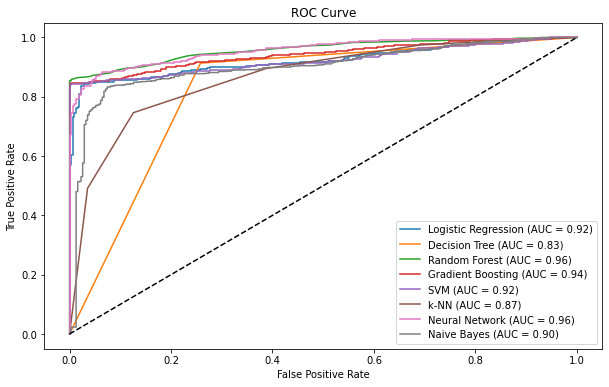

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.841593   0.884754  0.898780  0.891712  0.922632
1        Decision Tree  0.866372   0.903498  0.913415  0.908429  0.827675
2        Random Forest  0.894690   0.980796  0.871951  0.923176  0.959138
3    Gradient Boosting  0.879646   0.981690  0.850000  0.911111  0.942124
4                  SVM  0.854867   0.929319  0.865854  0.896465  0.923116
5                 k-NN  0.817699   0.859485  0.895122  0.876941  0.868755
6       Neural Network  0.887611   0.931507  0.912195  0.921750  0.956861
7          Naive Bayes  0.579646   0.988669  0.425610  0.595055  0.900555


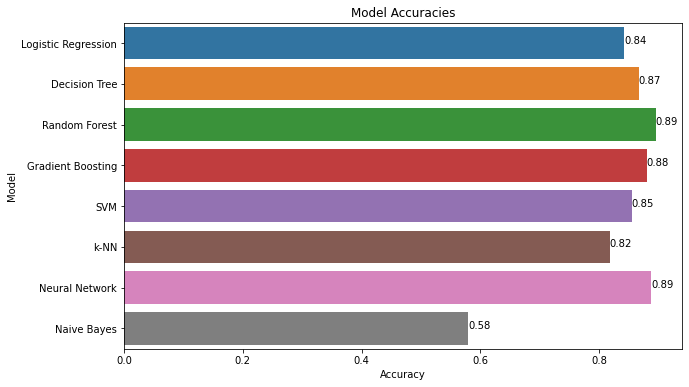

Decision Tree Rules:
 |--- num__CustCareScore <= -0.02
|   |--- class: 1
|--- num__CustCareScore >  -0.02
|   |--- cat__Channel_1 <= 0.50
|   |   |--- cat__MaritalStatus_1 <= 0.50
|   |   |   |--- cat__Occupation_1 <= 0.50
|   |   |   |   |--- cat__Designation_4 <= 0.50
|   |   |   |   |   |--- num__Age <= 1.46
|   |   |   |   |   |   |--- num__CustTenure <= 2.51
|   |   |   |   |   |   |   |--- cat__Channel_0 <= 0.50
|   |   |   |   |   |   |   |   |--- num__MonthlyIncome <= -1.31
|   |   |   |   |   |   |   |   |   |--- cat__Zone_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- cat__Zone_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- num__MonthlyIncome >  -1.31
|   |   |   |   |   |   |   |   |   |--- cat__ExistingProdType_5.5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- num__MonthlyIncome <= -1.19
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   

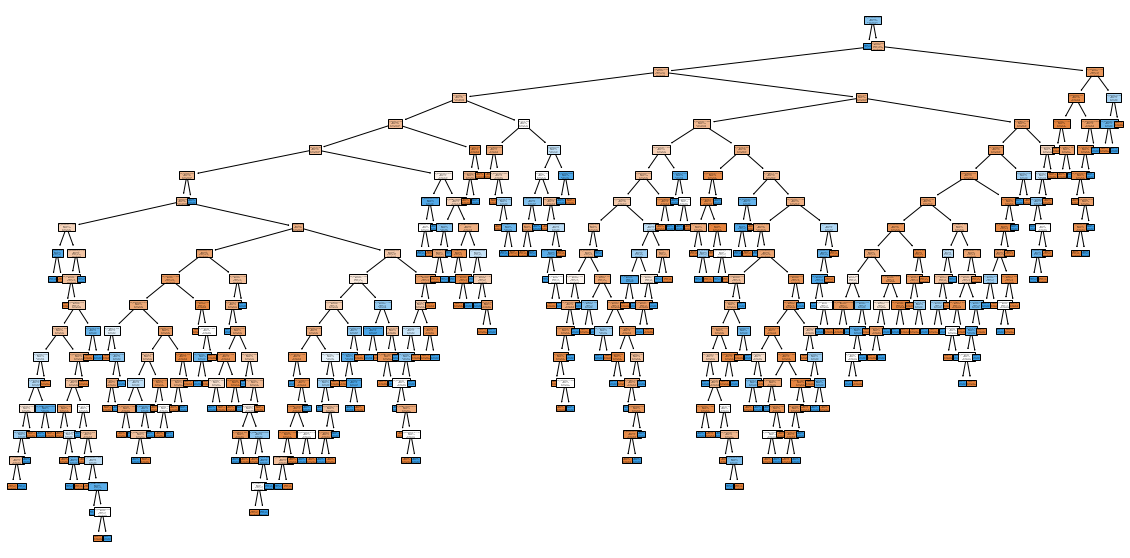

Optimal Threshold: 0.8, F1 Score: 0.9070533948582729
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81       310
           1       0.99      0.84      0.91       820

    accuracy                           0.88      1130
   macro avg       0.84      0.90      0.86      1130
weighted avg       0.91      0.88      0.88      1130

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     112.9
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:28:32   Log-Likelihood:                -632.35
No. Observations:                3390   AIC:                             1349.
Df Residuals:       

In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Select features and target variable
target = 'Churn'
features = ['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
categorical_features = ['Channel', 'Occupation', 'EducationField', 'Gender', 'ExistingProdType', 'Designation', 'MaritalStatus', 'Zone', 'PaymentMethod']

# Preprocess the data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare the data
X = df.drop(columns=[target])
y = df[target]

# Split the data into training and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
}

# Dictionary to store the evaluation metrics of each model
evaluation_metrics = []

# Initialize the ROC plot
plt.figure(figsize=(10, 6))

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], "predict_proba") else pipeline.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    evaluation_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Add the diagonal line for the ROC plot
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title to the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

# Show the ROC plot
plt.show()

# Convert the evaluation metrics to a DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_df)

# Visualize the evaluation metrics
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y='Model', data=evaluation_df, label="Accuracy")
plt.title('Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Add the values on top of the bars
for index, value in enumerate(evaluation_df['Accuracy']):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

# Decision Tree for Actionable Insights
tree_model = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', tree_model)
])
pipeline.fit(X_train, y_train)
tree_model = pipeline.named_steps['classifier']

# Extract preprocessed feature names
feature_names = preprocessor.get_feature_names_out()
# Extract preprocessed feature names and convert to list
feature_names = preprocessor.get_feature_names_out().tolist()

# Export decision tree rules
tree_rules = export_text(tree_model, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=['No Churn', 'Churn'])
plt.show()

# Logistic Regression with Decision Threshold Optimization
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_model)
])
pipeline.fit(X_train, y_train)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Find the optimal threshold
thresholds = np.arange(0.0, 1.1, 0.1)
optimal_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_optimal = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_optimal)
    if f1 > best_f1:
        best_f1 = f1
        optimal_threshold = threshold

print(f"Optimal Threshold: {optimal_threshold}, F1 Score: {best_f1}")

# Predict using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print("Classification Report with Optimal Threshold:\n", classification_report(y_test, y_pred_optimal))

# OLS Regression
X_ols = X_train.copy()
X_ols = pd.get_dummies(X_ols, columns=categorical_features, drop_first=True)
X_ols = sm.add_constant(X_ols)  # Add a constant term for the intercept
ols_model = sm.OLS(y_train, X_ols).fit()

# Print OLS regression results
print(ols_model.summary())


In [245]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Ensure target variable is also encoded if necessary
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [246]:
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [247]:
# voting classifier

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Create individual models
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

# Combine models using Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'  # 'hard' for majority voting, 'soft' for probability voting
)

# Fit and predict
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Accuracy: 1.0


In [248]:
#bagging
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100)

# Fit and predict
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 1.0


In [249]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100)

# Fit and predict
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

# Evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))


Gradient Boosting Accuracy: 1.0


In [250]:
#stacking
from sklearn.ensemble import StackingClassifier

# Create individual models
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]

# Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit and predict
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Evaluate
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))


Stacking Classifier Accuracy: 1.0


In [251]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Voting Classifier
voting_clf.fit(X_train, y_train)
voting_results = evaluate_model(voting_clf, X_test, y_test)
print("Voting Classifier:", voting_results)

# Random Forest
rf_clf.fit(X_train, y_train)
rf_results = evaluate_model(rf_clf, X_test, y_test)
print("Random Forest:", rf_results)

# Gradient Boosting
gb_clf.fit(X_train, y_train)
gb_results = evaluate_model(gb_clf, X_test, y_test)
print("Gradient Boosting:", gb_results)

# Stacking Classifier
stacking_clf.fit(X_train, y_train)
stacking_results = evaluate_model(stacking_clf, X_test, y_test)
print("Stacking Classifier:", stacking_results)


Voting Classifier: (1.0, 1.0, 1.0, 1.0, 1.0)
Random Forest: (1.0, 1.0, 1.0, 1.0, 1.0)
Gradient Boosting: (1.0, 1.0, 1.0, 1.0, 1.0)
Stacking Classifier: (1.0, 1.0, 1.0, 1.0, 1.0)


In [252]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Voting Classifier
voting_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')
print("Voting Classifier Cross-Validation Scores:", voting_scores)
print("Voting Classifier Mean Cross-Validation Score:", voting_scores.mean())

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Cross-Validation Score:", rf_scores.mean())

# Cross-validation for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
print("Gradient Boosting Cross-Validation Scores:", gb_scores)
print("Gradient Boosting Mean Cross-Validation Score:", gb_scores.mean())


Voting Classifier Cross-Validation Scores: [1. 1. 1. 1. 1.]
Voting Classifier Mean Cross-Validation Score: 1.0
Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Mean Cross-Validation Score: 1.0
Gradient Boosting Cross-Validation Scores: [1. 1. 1. 1. 1.]
Gradient Boosting Mean Cross-Validation Score: 1.0


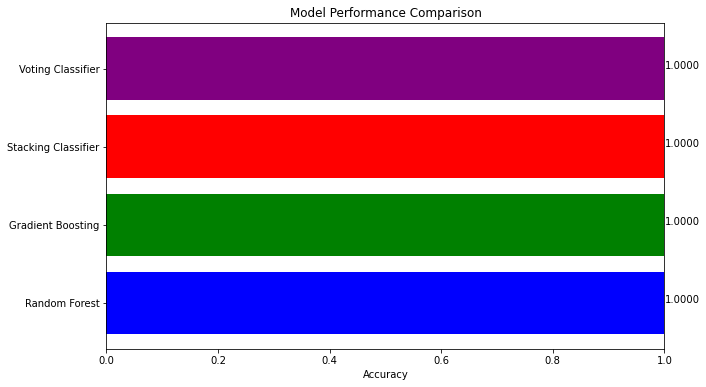

In [255]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Sample dataset (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Assume df is your DataFrame, and 'target' is your target variable
X = df.drop(columns='Churn')
y = df['Churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Random Forest Grid Search
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Gradient Boosting Grid Search
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
scores_rf = cross_val_score(best_rf, X, y, cv=skf, scoring='accuracy')
scores_gb = cross_val_score(best_gb, X, y, cv=skf, scoring='accuracy')

# Feature Selection
selector = SelectFromModel(estimator=RandomForestClassifier())
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Re-train the model on the selected features
best_rf.fit(X_train_selected, y_train)
rf_predictions = best_rf.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, rf_predictions)

best_gb.fit(X_train_selected, y_train)
gb_predictions = best_gb.predict(X_test_selected)
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Stacking Classifier
base_learners = [
    ('rf', best_rf),
    ('gb', best_gb),
]
meta_learner = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)
stacking_predictions = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

# Voting Classifier
voting_clf = VotingClassifier(estimators=base_learners, voting='soft')
voting_clf.fit(X_train, y_train)
voting_predictions = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)

# Visualization
models = ['Random Forest', 'Gradient Boosting', 'Stacking Classifier', 'Voting Classifier']
accuracies = [rf_accuracy, gb_accuracy, stacking_accuracy, voting_accuracy]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.4f}')
plt.show()
